# 11장 다중회귀 관련 추가 주제

## 이진적 설명변수

In [1]:
import pandas as pd
from numpy import log
import statsmodels.formula.api as smf

Wages1 = pd.read_csv('csv/Ecdat/Wages1.csv')
Wages1['female'] = [int(x=='female') for x in Wages1.sex]
ols = smf.ols('log(wage)~school+exper+female', data=Wages1).fit()
ols.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log(wage)   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.137
No. Observations:                3294   F-statistic:                     174.7
Covariance Type:            nonrobust   Prob (F-statistic):          4.04e-105
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0168      0.088     -0.192      0.848      -0.188       0.155
school         0.1234      0.006     19.802      0.000       0.111       0.136
exper          0.0354      0.005      7.845      0.000       0.027       0.044
female        -0.2426      0.020    -11.860      0.000      -0.283      -0.202
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 상호작용항

In [2]:
# Continue
ols = smf.ols('log(wage)~female*school+exper', data=Wages1).fit()
ols.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log(wage)   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.136
No. Observations:                3294   F-statistic:                     131.0
Covariance Type:            nonrobust   Prob (F-statistic):          5.79e-104
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0122      0.109     -0.112      0.911      -0.226       0.201
female           -0.2529      0.148     -1.714      0.087      -0.542       0.036
school            0.1230      0.008     15.003      0.000       0.107       0.139
female:school     0.0009      0.012      0.071      0.944      -0.024       0.025
exper             0.0354      0.005      7.793      0.000       0.026       0.044
=================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 집단별 회귀와 전체 회귀

In [3]:
# Continue
eqa = smf.ols('log(wage)~school', data=Wages1).fit()
eqb = smf.ols('log(wage)~school+female', data=Wages1).fit()
eqc = smf.ols('log(wage)~school*female', data=Wages1).fit()
eqd = smf.ols('log(wage)~school', data=Wages1[Wages1.female==0]).fit()
eqe = smf.ols('log(wage)~school', data=Wages1[Wages1.female==1]).fit()

In [4]:
#https://economics.stackexchange.com/questions/11774/outputting-regressions-as-table-in-python-similar-to-outreg-in-stata
from statsmodels.iolib.summary2 import summary_col

outreg = summary_col([eqa,eqb,eqc,eqd,eqe], stars=True)
outreg # Why do I have R-squared and R-squared Adj.?

,log(wage) I,log(wage) II,log(wage) III,log(wage) IIII,log(wage) IIIII
Intercept,0.3639***,0.3793***,0.4326***,0.4326***,0.0419
,(0.0738),(0.0721),(0.0937),(0.0908),(0.1181)
school,0.1052***,0.1145***,0.1099***,0.1099***,0.1210***
,(0.0063),(0.0062),(0.0081),(0.0078),(0.0099)
female,,-0.2601***,-0.3907***,,
,,(0.0205),(0.1478),,
school:female,,,0.0112,,
,,,(0.0125),,
R-squared,0.0784,0.1213,0.1215,0.1021,0.0873
R-squared Adj.,0.0781,0.1208,0.1207,0.1016,0.0867


## 예제 11.1 Card and Krueger (1994)

In [5]:
import pandas as pd
import statsmodels.formula.api as smf

Fastfood = pd.read_csv('csv/loedata/Fastfood.csv')
ols = smf.ols('fte~after', data=Fastfood[Fastfood.nj==1]).fit()
ols.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fte   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
No. Observations:                 640   F-statistic:                    0.6536
Covariance Type:            nonrobust   Prob (F-statistic):              0.419
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.4394      0.513     39.805      0.000      19.431      21.448
after          0.5880      0.727      0.808      0.419      -0.840       2.016
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
smf.ols('fte~after', data=Fastfood[Fastfood.nj==0]).fit().summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fte   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.005
No. Observations:                 154   F-statistic:                     1.727
Covariance Type:            nonrobust   Prob (F-statistic):              0.191
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.3312      1.165     20.024      0.000      21.029      25.633
after         -2.1656      1.648     -1.314      0.191      -5.421       1.090
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
smf.ols('fte~nj', data=Fastfood[Fastfood.after==0]).fit().summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fte   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.011
No. Observations:                 398   F-statistic:                     5.525
Covariance Type:            nonrobust   Prob (F-statistic):             0.0192
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.3312      1.105     21.118      0.000      21.159      25.503
nj            -2.8918      1.230     -2.351      0.019      -5.310      -0.473
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
smf.ols('fte~nj', data=Fastfood[Fastfood.after==1]).fit().summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fte   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
No. Observations:                 396   F-statistic:                   0.01428
Covariance Type:            nonrobust   Prob (F-statistic):              0.905
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.1656      1.038     20.397      0.000      19.125      23.206
nj            -0.1382      1.156     -0.119      0.905      -2.411       2.135
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
smf.ols('fte~nj*after', data=Fastfood).fit().summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fte   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
No. Observations:                 794   F-statistic:                     1.964
Covariance Type:            nonrobust   Prob (F-statistic):              0.118
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.3312      1.072     21.767      0.000      21.227      25.435
nj            -2.8918      1.194     -2.423      0.016      -5.235      -0.549
after         -2.1656      1.516     -1.429      0.154      -5.141       0.810
nj:after       2.7536      1.688      1.631      0.103      -0.561       6.068
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
#https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan
Fastfood = pd.read_csv('csv/loedata/Fastfood.csv')
print('Original:', Fastfood.shape)
Fastfood = Fastfood.dropna(subset = ['id','fte','nj','after'])
print('Cleaned :', Fastfood.shape)
mod = smf.ols('fte~nj*after', data=Fastfood)

Original: (820, 35)
Cleaned : (794, 35)


In [11]:
mod.fit(cov_type='cluster', cov_kwds={'groups': Fastfood['id']}).summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fte   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
No. Observations:                 794   F-statistic:                     1.802
Covariance Type:              cluster   Prob (F-statistic):              0.146
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.3312      1.347     17.327      0.000      20.692      25.970
nj            -2.8918      1.440     -2.009      0.045      -5.713      -0.070
after         -2.1656      1.218     -1.778      0.075      -4.553       0.222
nj:after       2.7536      1.307      2.107      0.035       0.193       5.315
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (cluster)
"""

## 제곱항 자료 생성

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "retina"

np.random.seed(101)
n = 100
x = np.random.normal(loc=3.2, scale=1, size=n)
u = np.random.normal(scale=.75, size=n)
y = 3+7*x-x**2+u

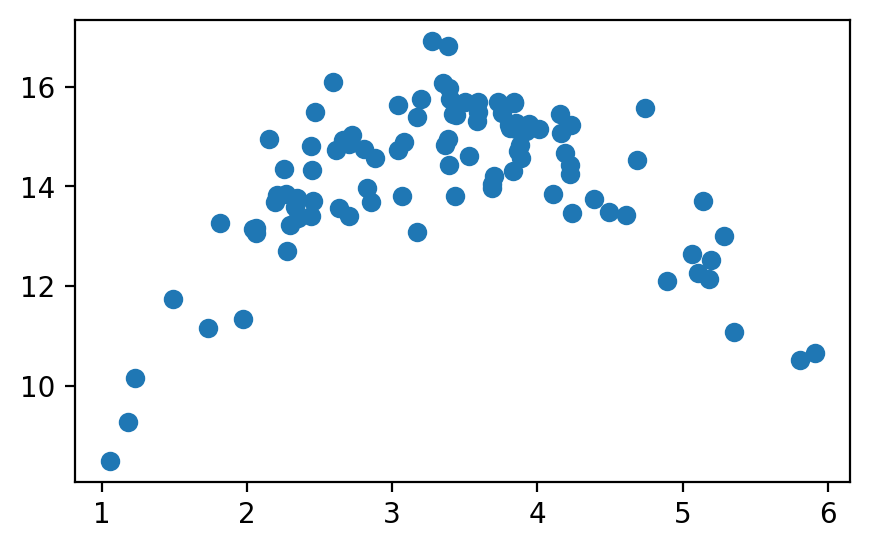

In [13]:
plt.figure(figsize=(5,3))
plt.scatter(x,y)
plt.show()

## 예제 11.2 나이의 2차 함수로서의 흡연량

In [14]:
import pandas as pd
from numpy import log
import statsmodels.formula.api as smf

smoke = pd.read_csv('csv/wooldridge/smoke.csv')
ols = smf.ols('cigs~log(income)+log(cigpric)+educ+age+agesq', data=smoke).fit()
ols.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cigs   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.039
No. Observations:                 807   F-statistic:                     7.565
Covariance Type:            nonrobust   Prob (F-statistic):           5.92e-07
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.3688     23.897      0.225      0.822     -41.540      52.277
log(income)      0.7583      0.729      1.041      0.298      -0.672       2.189
log(cigpric)    -2.8532      5.733     -0.498      0.619     -14.107       8.401
educ            -0.5141      0.168     -3.068      0.002      -0.843      -0.185
age              0.7806      0.161      4.860      0.000       0.465       1.096
agesq           -0.0091      0.002     -5.207      0.000      -0.013      -0.006
================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
-ols.params.age/(2*ols.params.agesq)

42.86552149669145

In [16]:
#https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html
smoke.age.describe()

count    807.000000
mean      41.237918
std       17.027285
min       17.000000
25%       28.000000
50%       38.000000
75%       54.000000
max       88.000000
Name: age, dtype: float64

In [17]:
#https://stackoverflow.com/questions/33768122/python-pandas-dataframe-how-to-multiply-entire-column-with-a-scalar
#https://stackoverflow.com/questions/53162/how-can-i-do-a-line-break-line-continuation-in-python
smoke['pred0'] = ols.params.Intercept \
               + log(smoke.income)*ols.params['log(income)'] \
               + log(smoke.cigpric)*ols.params['log(cigpric)'] \
               + smoke.educ*ols.params.educ

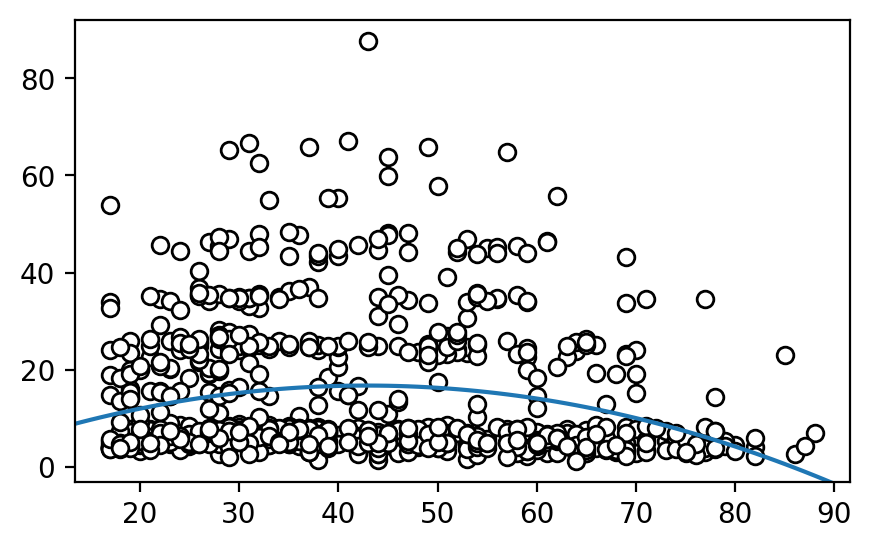

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "retina"

plt.figure(figsize=(5,3))
plt.scatter(smoke.age, smoke.cigs-smoke.pred0, color='w', edgecolors='k')
plt.xlim(plt.gca().get_xlim()) # fix x limits
plt.ylim(plt.gca().get_ylim()) # fix y limits
x = np.arange(100)
plt.plot(x, x*ols.params.age+(x**2)*ols.params.agesq)
plt.show()

## 예제 11.3 건평과 주택가격

In [19]:
import pandas as pd
from numpy import log
import statsmodels.formula.api as smf

Housing = pd.read_csv('csv/Ecdat/Housing.csv')
H3 = Housing[Housing.bedrooms==3].copy()
ols2 = smf.ols('log(price)~log(lotsize)+I(log(lotsize)**2)', data=H3).fit()
ols2.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log(price)   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.343
No. Observations:                 301   F-statistic:                     79.39
Covariance Type:            nonrobust   Prob (F-statistic):           2.30e-28
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -4.8947      5.384     -0.909      0.364     -15.491       5.702
log(lotsize)             3.2905      1.273      2.585      0.010       0.785       5.796
I(log(lotsize) ** 2)    -0.1651      0.075     -2.197      0.029      -0.313      -0.017
========================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
-ols2.params['log(lotsize)']/(2*ols2.params['I(log(lotsize) ** 2)'])

9.965110082016484

In [21]:
log(H3.lotsize).describe()

count    301.000000
mean       8.477732
std        0.412099
min        7.408531
25%        8.188689
50%        8.484670
75%        8.779557
max        9.655026
Name: lotsize, dtype: float64

In [22]:
ols1 = smf.ols('log(price)~log(lotsize)', data=H3).fit()
ols1.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log(price)   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.335
No. Observations:                 301   F-statistic:                     152.0
Covariance Type:            nonrobust   Prob (F-statistic):           1.62e-28
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.9115      0.341     20.285      0.000       6.241       7.582
log(lotsize)     0.4949      0.040     12.329      0.000       0.416       0.574
================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

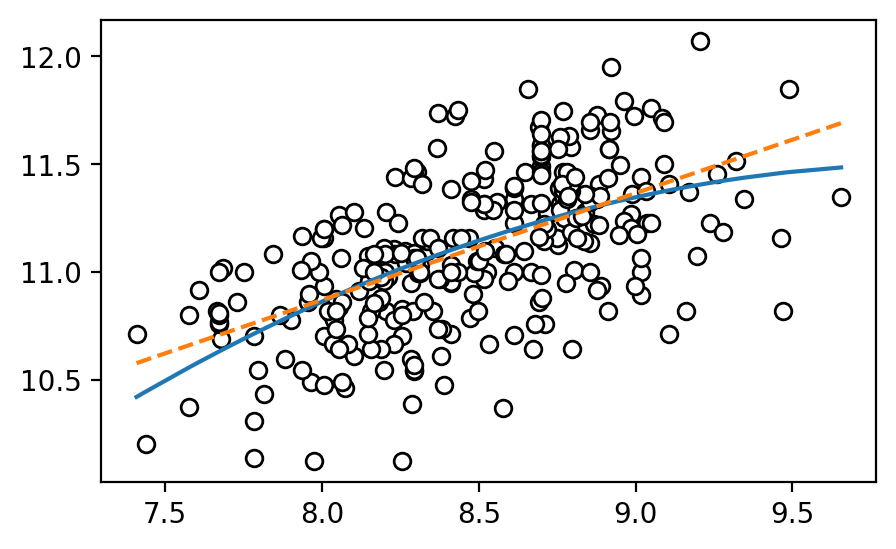

In [23]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "retina"
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(5,3))
plt.scatter(np.log(H3.lotsize), np.log(H3.price), color='w', edgecolors='k')
plt.xlim(plt.gca().get_xlim()) # fix x limits
plt.ylim(plt.gca().get_ylim()) # fix y limits
x = np.log(H3.lotsize.sort_values())
b2 = ols2.params
b1 = ols1.params
plt.plot(x, b2[0]+b2[1]*x+b2[2]*x**2)
plt.plot(x, b1[0]+b1[1]*x, '--')
plt.show()

## 예제 11.4 가구소득과 소비의 관계

In [24]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols as OLS

Hies = pd.read_csv('csv/loedata/Hies.csv')
len(Hies)

1368

In [25]:
Hies.cons.describe()

count    1.368000e+03
mean     2.422611e+06
std      1.199659e+06
min      2.546630e+05
25%      1.686188e+06
50%      2.239735e+06
75%      2.865792e+06
max      1.532575e+07
Name: cons, dtype: float64

In [26]:
Hies.inc.describe()

count    1.368000e+03
mean     4.221342e+06
std      2.160279e+06
min      0.000000e+00
25%      2.855448e+06
50%      3.914338e+06
75%      5.193994e+06
max      1.899592e+07
Name: inc, dtype: float64

In [27]:
np.sum(Hies.inc==0)

8

In [28]:
Hies[Hies.inc>0].inc.describe()

count    1.360000e+03
mean     4.246173e+06
std      2.142139e+06
min      6.997000e+03
25%      2.879314e+06
50%      3.928140e+06
75%      5.212878e+06
max      1.899592e+07
Name: inc, dtype: float64

In [29]:
Hies['inca'] = [x if x>0 else 1 for x in Hies.inc]
Hies['incmil'] = Hies.inc/1e6

In [30]:
fm = 'np.log(cons)~np.log(famsize)+emp+age+I(age**2)+ownhouse+female+educ'
fm1 = fm+'+np.log(inc)'
fm2 = fm+'+np.log(inca)'
fm3 = fm+'+np.log(inc+1)'
fm4 = fm+'+np.log(inca)+I(inc==0)'
fm5 = fm+'+incmil+I(incmil**2)'

In [31]:
OLS = smf.ols
ols1 = OLS(fm1, data=Hies[Hies.inc>0]).fit()
ols2 = OLS(fm2, data=Hies).fit()
ols3 = OLS(fm3, data=Hies).fit()
ols4 = OLS(fm4, data=Hies).fit()
ols5 = OLS(fm5, data=Hies).fit()

In [32]:
from statsmodels.iolib.summary2 import summary_col

outreg = summary_col([ols1,ols2,ols3,ols4,ols5], stars=True)
outreg

,np.log(cons) I,np.log(cons) II,np.log(cons) III,np.log(cons) IIII,np.log(cons) IIIII
Intercept,11.7484***,14.8247***,14.8247***,11.8755***,17.1542***
,(1.6693),(1.8555),(1.8555),(1.6587),(1.6592)
np.log(famsize),0.2948***,0.3976***,0.3976***,0.2971***,0.3045***
,(0.0220),(0.0238),(0.0238),(0.0219),(0.0219)
emp,-0.0647,0.1140**,0.1140**,-0.0572,-0.0088
,(0.0411),(0.0445),(0.0445),(0.0406),(0.0396)
age,-0.2065**,-0.1128,-0.1128,-0.2129**,-0.2033**
,(0.0960),(0.1071),(0.1071),(0.0955),(0.0955)
I(age ** 2),0.0030**,0.0017,0.0017,0.0031**,0.0030**
,(0.0014),(0.0015),(0.0015),(0.0014),(0.0014)


## 예제 11.5 종속변수 값의 구간예측

In [33]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

Housing = pd.read_csv('csv/Ecdat/Housing.csv')
ols = smf.ols('np.log(price)~np.log(lotsize/5000)+I(bedrooms-3)', data=Housing).fit()
theta = ols.params.Intercept
se = np.sqrt(ols.scale + ols.bse.Intercept**2)
[theta, se]

[11.08939418636319, 0.28454444951618413]

In [34]:
from scipy.stats import t

c = t.ppf(.975, ols.df_resid)*se
[theta-c, theta+c]

[10.530451460392339, 11.648336912334042]

## 예제 11.6 종속변수가 로그 형태일 때 수준값의 예측

In [35]:
# Continue
alpha1 = np.exp(ols.scale/2)
print(alpha1)
print(np.exp(theta)*alpha1)

1.0412349999323829
68172.8516498904


In [36]:
alpha2 = np.exp(ols.resid).mean()
print(alpha2)
print(np.exp(theta)*alpha2)

1.0403223271241229
68113.09615956743


## 예제 11.7 RESET 검정

In [37]:
import numpy as np

np.random.seed(2)
n = 100
x1 = np.random.normal(size=n)
x2 = np.exp(np.random.normal(size=n))
y = 1+x1-np.log(x2)+np.random.normal(size=n)
#https://stackoverflow.com/questions/44118416/pandas-using-variables-to-create-dataframe-with-one-row-and-column-names-from-v
DF = pd.DataFrame({"y": np.array(y), "x1": np.array(x1), "x2": np.array(x2)})
DF.head()
# Data set is different from what is generated by R

,y,x1,x2
0,-1.729282,-0.416758,3.194790
1,0.131133,-0.056267,1.471199
2,-0.151210,-2.136196,0.322023
3,3.708615,1.640271,1.542019
4,0.380249,-1.793436,0.737797


In [38]:
ols = smf.ols('y~x1+x2', data=DF).fit()

In [39]:
#https://stackoverflow.com/questions/73501475/how-to-perform-linearity-tests-on-ols-regression-statmodels
from statsmodels.stats.diagnostic import linear_reset

linear_reset(ols, power = [2,3], test_type = "fitted", use_f = True) # Doesn't work. Version mismatch.

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=9.286693843009292, p=0.00020712555845992816, df_denom=95, df_num=2>

In [40]:
DF['yhat'] = ols.fittedvalues
aux = smf.ols('y~x1+x2+I(yhat**2)+I(yhat**3)', data=DF).fit()
aux.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.524
No. Observations:                 100   F-statistic:                     28.20
Covariance Type:            nonrobust   Prob (F-statistic):           1.92e-15
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.7255      0.197      3.690      0.000       0.335       1.116
x1               0.6947      0.164      4.248      0.000       0.370       1.019
x2              -0.1860      0.038     -4.857      0.000      -0.262      -0.110
I(yhat ** 2)     0.2578      0.065      3.949      0.000       0.128       0.387
I(yhat ** 3)    -0.0108      0.022     -0.498      0.619      -0.054       0.032
================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
aux.f_test([[0,0,0,1,0], [0,0,0,0,1]])

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=9.286693843009292, p=0.00020712555845992816, df_denom=95, df_num=2>

In [42]:
ols2 = smf.ols('y~x1+np.log(x2)', data=DF).fit()

linear_reset(ols2, power=[2,3], test_type = 'fitted', use_f = True) # Doesn't work. Version mismatch.

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.8485970120597683, p=0.4312333489202228, df_denom=95, df_num=2>